In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train= pd.read_csv('/content/drive/MyDrive/Cyberlabs- ML/linear_data/Linear_train.csv')
train.head()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
0,0,-9.989516,1564.957586,8.199060,32.508797,19.464400,1644.524093,26.100966,34.731954,4378.575414,...,770.535311,30.060441,-25.002361,11.892468,-34.329383,37.218423,-4.440530,29.075092,29.107896,311.232491
1,1,-17.591800,1559.053039,12.302737,-36.351098,6.256406,1640.834263,12.954212,-43.333128,4833.766813,...,997.260070,-1.329145,16.022086,42.972484,-7.372877,45.550946,37.576551,12.926551,-32.565844,6393.112342
2,2,-28.321695,1305.900952,-35.681049,-9.039358,-45.519426,2039.003363,-0.154348,18.107957,4162.395297,...,616.059291,-6.997085,27.846844,26.511376,19.323152,-35.807513,-5.913019,15.046779,-34.332357,2601.046223
3,3,-40.471241,1612.746996,-28.980454,2.137719,-34.767491,2757.469393,23.857472,-48.434183,4340.953927,...,715.537625,-12.441561,47.883435,36.994884,30.783992,22.162383,16.465836,41.435425,33.561233,13572.118106
4,4,-36.525271,1852.275617,-32.744347,-1.439526,-14.061837,2138.422485,44.061988,33.336936,4099.453685,...,629.221442,10.992360,-47.143335,-8.296962,-8.086565,39.169726,-49.540056,-32.518653,-36.320202,-5462.446898


In [ ]:
test= pd.read_csv('/content/drive/MyDrive/Cyberlabs- ML/linear_data/Linear_test.csv')
test.head()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
0,0,40.790740,1187.897579,-28.941991,43.498302,14.157983,2536.000797,-34.181638,-14.940211,4746.739893,...,707.727094,21.030812,-44.606156,-9.625546,42.276162,-11.000471,-19.830564,-5.529430,-28.154864,-163.522723
1,1,47.968749,1498.588679,24.922821,-38.979082,16.405452,1798.950305,-23.660484,-34.792328,4076.982013,...,737.135391,-17.860346,42.274026,-19.886483,16.337922,9.025313,27.760845,21.484409,-24.206545,6484.664510
2,2,9.762564,1316.354415,1.170771,10.365178,-11.993156,2714.382200,26.382837,27.442924,4178.719984,...,940.732329,-35.879432,23.837924,3.729191,33.564390,12.848880,-45.837834,-49.592176,36.688611,2393.818082
3,3,6.414629,1895.586749,44.496934,-49.677800,-24.825833,2327.316373,1.406644,44.103008,4586.697737,...,925.441952,-19.409771,25.346975,-7.729920,-42.813516,-17.666168,35.506064,-49.048652,-34.048583,-9397.072355
4,4,-4.112012,1130.920162,19.103960,-8.741503,-28.589701,1299.418975,42.946135,4.758032,4809.536369,...,797.953813,-46.788081,43.876292,34.009303,34.061089,-30.182903,-41.188733,26.828040,-22.476663,10487.323575


In [ ]:
l= train.shape[1]
X_train= train.iloc[:, 1:l-1]
y_train= train.iloc[:, l-1]
m=train.shape[0]
X_train= X_train.to_numpy()
y_train= y_train.to_numpy()
y_train= y_train.reshape(X_train.shape[0], 1)
print(X_train.shape)
y_train.shape

(50000, 20)


(50000, 1)

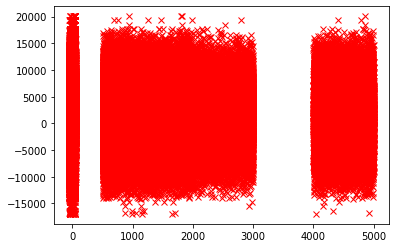

In [ ]:
plt.plot(X_train, y_train, 'rx')

In [ ]:
def featureNormalization(X):
  X_norm= X
  mu=np.mean(X, axis=0)
  sigma= np.std(X, axis=0)
  X_norm= (X- mu)/sigma 

  return [X_norm, mu, sigma]

In [ ]:
[X_train, mu, sigma] = featureNormalization(X_train)

In [ ]:
X_train= np.c_[np.ones(m), X_train]
n= X_train.shape[1]
print(n)

21


In [ ]:
def computeCost(X_train, y_train, theta):
  m= y_train.shape[0]
  J=0
  predictions= np.dot(X_train, theta)
  J= 1/(2*m) * np.sum(np.square(predictions-y_train))
  return J

In [ ]:
def gradientDescent(X_train, y_train, theta, alpha, num_iters):
  m= y_train.shape[0]
  J_history= np.zeros((num_iters, 1))

  for iter in range(0, num_iters-1):
    predictions= np.dot(X_train, theta)
    predictions.shape
    delta= np.dot(X_train.T, predictions - y_train)/m
    delta.shape
    theta= theta - alpha*delta
    J_history[iter]= computeCost(X_train, y_train, theta)

  return [theta, J_history]

In [ ]:
alpha = 0.01
num_iters= 10000
theta= np.zeros((n, 1))
J_hist= np.zeros((num_iters, 1))
[theta, J_hist]= gradientDescent(X_train, y_train, theta, alpha, num_iters)
print("Theta calculated from gradient descent is ", theta)
theta.shape

Theta calculated from gradient descent is  [[ 1537.40898405]
 [  374.84297316]
 [   57.66355878]
 [ -780.65390906]
 [  230.87239175]
 [ 1068.01409067]
 [   87.20446456]
 [  548.72479312]
 [ -837.63793397]
 [   34.67370773]
 [  662.52453914]
 [  896.38283869]
 [   86.47649282]
 [-2631.25005955]
 [  980.57481622]
 [ 1301.44464438]
 [ 1476.95436293]
 [  693.42415381]
 [  -29.25523734]
 [ 2746.11651838]
 [  723.36220031]]


(21, 1)

[[1.31325623e+07]
 [1.28720123e+07]
 [1.26166340e+07]
 ...
 [1.90709867e+03]
 [1.90709867e+03]
 [0.00000000e+00]]


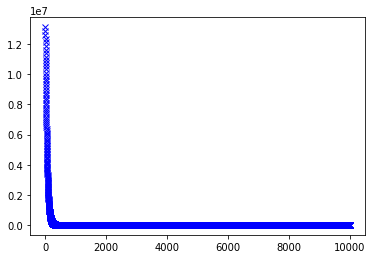

In [ ]:
print(J_hist)
plt.plot(range(num_iters), J_hist, 'bx')

In [ ]:
k= test.shape[1]
X_test= test.iloc[:, 1:l-1]
y_test= test.iloc[:, l-1]
m=test.shape[0]

X_test= X_test.to_numpy()
y_test= y_test.to_numpy()
y_test= y_test.reshape(X_test.shape[0], 1)

print(X_test.shape)
y_test.shape

(10000, 20)


(10000, 1)

In [ ]:
X_test = (X_test - mu)/sigma 
X_test 

array([[ 1.40975807, -1.08657594, -1.00024254, ..., -0.6870117 ,
        -0.19141266, -0.97090816],
       [ 1.65822395, -0.00972035,  0.86387877, ...,  0.95560992,
         0.74278028, -0.83440791],
       [ 0.3357217 , -0.64134445,  0.04188196, ..., -1.5846549 ,
        -1.71519115,  1.27084306],
       ...,
       [-1.20453086,  0.44808546,  0.94820239, ..., -0.24726467,
        -0.87742582,  1.62852991],
       [-1.06669707,  0.3768393 , -1.30168464, ...,  1.28587727,
        -0.96740849, -0.63625988],
       [ 1.37400893, -0.48664112, -0.25751637, ...,  1.31957967,
        -0.0979464 , -1.33366307]])

In [ ]:
X_test= np.c_[np.ones(m), X_test]
n= X_test.shape[1]
print(n)

21


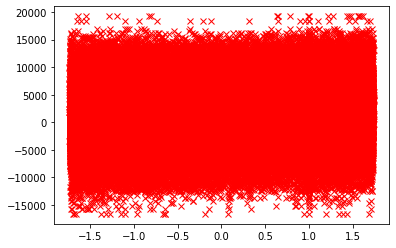

In [ ]:
plt.plot(X_test, y_test, 'rx')

In [ ]:
y_predict = np.dot(X_test, theta)
l= y_predict.shape

In [ ]:
mean_y_predict= np.mean(y_predict) * np.ones(l)
mean_y_test = np.mean(y_test) * np.ones(l)
accuracy = np.sum(np.square(y_predict - mean_y_predict)) / np.sum(np.square(y_test - mean_y_test)) * 100
print(accuracy)

99.98442763676978
